In [114]:
# zorgen voor de juiste modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV, cross_validate, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, BayesianRidge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

from xgboost import XGBRegressor

from pandas import DataFrame

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

# instellingen voor panda weergave aanpassen
pd.set_option("display.max.columns",None) # alle kolommen tonen
pd.set_option("display.max.rows",None)    # alle rijen tonen
pd.set_option("display.precision", 2)     # precisie van de kolommen aanpassen
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # floats output tot 3 decimalen

# dataset locatie 
DF_LOCATION = 'C:/Users/LuukJ/Desktop/DEP/Execute/Project/WMO Casus/Data/df_dataset_WMO.parquet.gzip'

# standaard waarden om in te vullen bij lege waarden
MISSING = 'Missing'
NONE = 'Not Present'

In [115]:
df = pd.read_parquet(DF_LOCATION)

In [116]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11267 entries, ('WK168000', '2019') to ('WK191612', '2015')
Data columns (total 109 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   financieringsvorm                               11267 non-null  category
 1   wmoclienten                                     10883 non-null  float32 
 2   wmoclientenper1000inwoners                      10437 non-null  float32 
 3   gemeentenaam                                    11267 non-null  object  
 4   aantalinwoners                                  11267 non-null  int64   
 5   mannen                                          11267 non-null  int64   
 6   vrouwen                                         11267 non-null  int64   
 7   k0tot15jaar                                     11267 non-null  int64   
 8   k15tot25jaar                                    11267 non-null  int64  

In [117]:
# beschrijven van alle continuous variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wmoclienten,10883.000,362.338,558.455,0.000,45.000,170.000,480.000,8935.000
wmoclientenper1000inwoners,10437.000,53.603,32.538,0.000,33.000,47.000,67.000,1000.000
aantalinwoners,11267.000,5850.703,7772.941,0.000,1175.000,3485.000,7872.500,109260.000
mannen,11267.000,2901.542,3834.488,0.000,605.000,1740.000,3882.500,54310.000
vrouwen,11267.000,2948.298,3941.835,0.000,570.000,1745.000,3955.000,54945.000
k0tot15jaar,11267.000,950.953,1354.189,0.000,175.000,525.000,1235.000,21070.000
k15tot25jaar,11267.000,720.908,1089.856,0.000,135.000,395.000,900.000,15020.000
k25tot45jaar,11267.000,1462.859,2227.508,0.000,235.000,750.000,1875.000,29415.000
k45tot65jaar,11267.000,1639.657,2086.819,0.000,370.000,1015.000,2195.000,33640.000
k65jaarofouder,11267.000,1076.703,1318.740,0.000,212.500,650.000,1495.000,20370.000


In [118]:
# beschrijven van alle categorial (factor) variables
df.describe(include= np.object).transpose()

,count,unique,top,freq
gemeentenaam,11267,379,Amsterdam,394
meestvoorkomendepostcode,11267,1,.,11267


In [119]:
# functie om  het aantal lege rijen (empty rows) en percentage lege rijen te berekenen. 
# let op: laat alleen kolommen zien met lege waarden (door de nulls != 0)
def df_er(df):
    """Calculates nulls and percentage null per column """
    nulls = df.isnull().sum()
    nulls_percentage = df.isnull().sum() * 100 / len(df)
    return pd.concat([nulls[nulls != 0], nulls_percentage[nulls_percentage != 0]], axis=1, keys=['Number of null values', 'Percentage of null values']).sort_values('Number of null values',ascending=False)
df_er(df)

,Number of null values,Percentage of null values
dekkingspercentage,11267,100.000
percentagewoningenmetstadsverwarming,10614,94.204
bedrijfsmotorvoertuigen,8023,71.208
personenautos6jaarenouder,5470,48.549
personenautosjongerdan6jaar,5470,48.549
gemiddeldinkomenperinkomensontvanger,4383,38.901
geweldsenseksuelemisdrijven,4295,38.120
vernielingmisdrijftegenopenbareorde,4295,38.120
totaaldiefstaluitwoningschuured,4295,38.120
gemiddeldinkomenperinwoner,4219,37.446


In [120]:
# beschrijving van de Y value
df['wmoclientenper1000inwoners'].describe()

count   10437.000
mean       53.603
std        32.538
min         0.000
25%        33.000
50%        47.000
75%        67.000
max      1000.000
Name: wmoclientenper1000inwoners, dtype: float64

In [121]:
df.shape[0]

11267

In [122]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=['wmoclientenper1000inwoners'],
    inplace=True
)

In [123]:
df.shape[0]

10437

In [124]:
# functie maken om de distribution, skewness en kurtosis ten opzichte van een normale verdeling te zien
def KD_QQ_plot(df, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(df, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    # QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(df, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(df.skew(), df.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

C:\Users\LuukJ\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


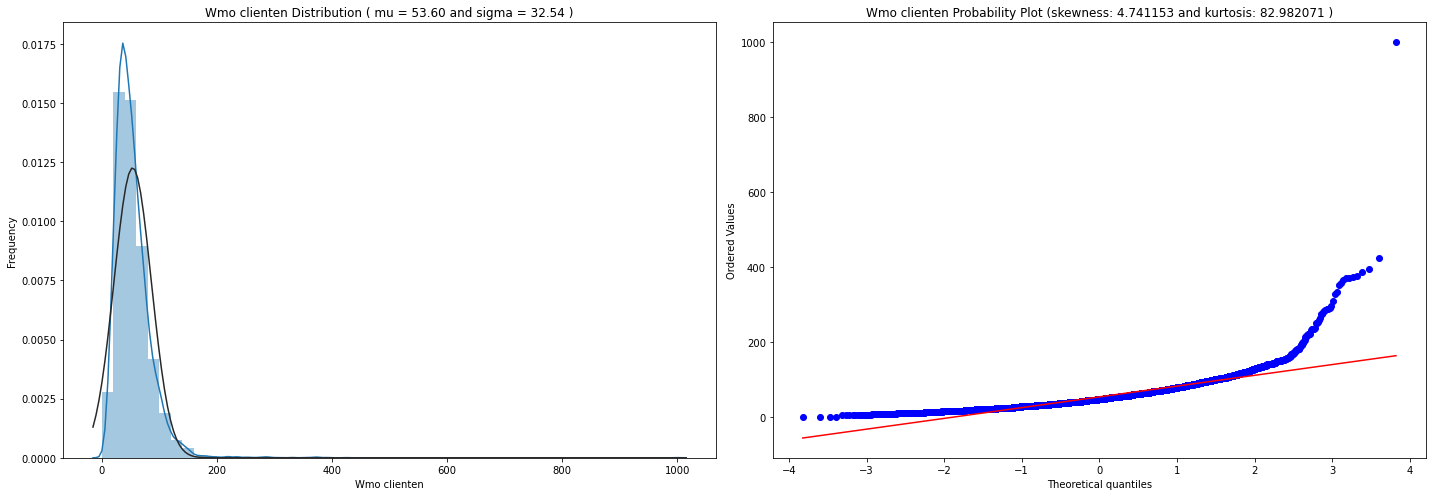

In [125]:
# distributie van Y ziet er right skewed uit. 
KD_QQ_plot(df.wmoclientenper1000inwoners, 'Wmo clienten')

<AxesSubplot:xlabel='wmoclientenper1000inwoners', ylabel='aantalinwoners'>

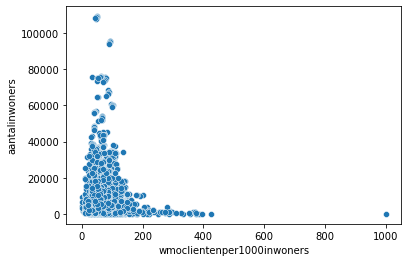

In [126]:
# scatterplot maken van de Y ten opzichte van het aantal inwoners 
sns.scatterplot(data=df, x='wmoclientenper1000inwoners', y="aantalinwoners")

## Correlation plot

<AxesSubplot:>

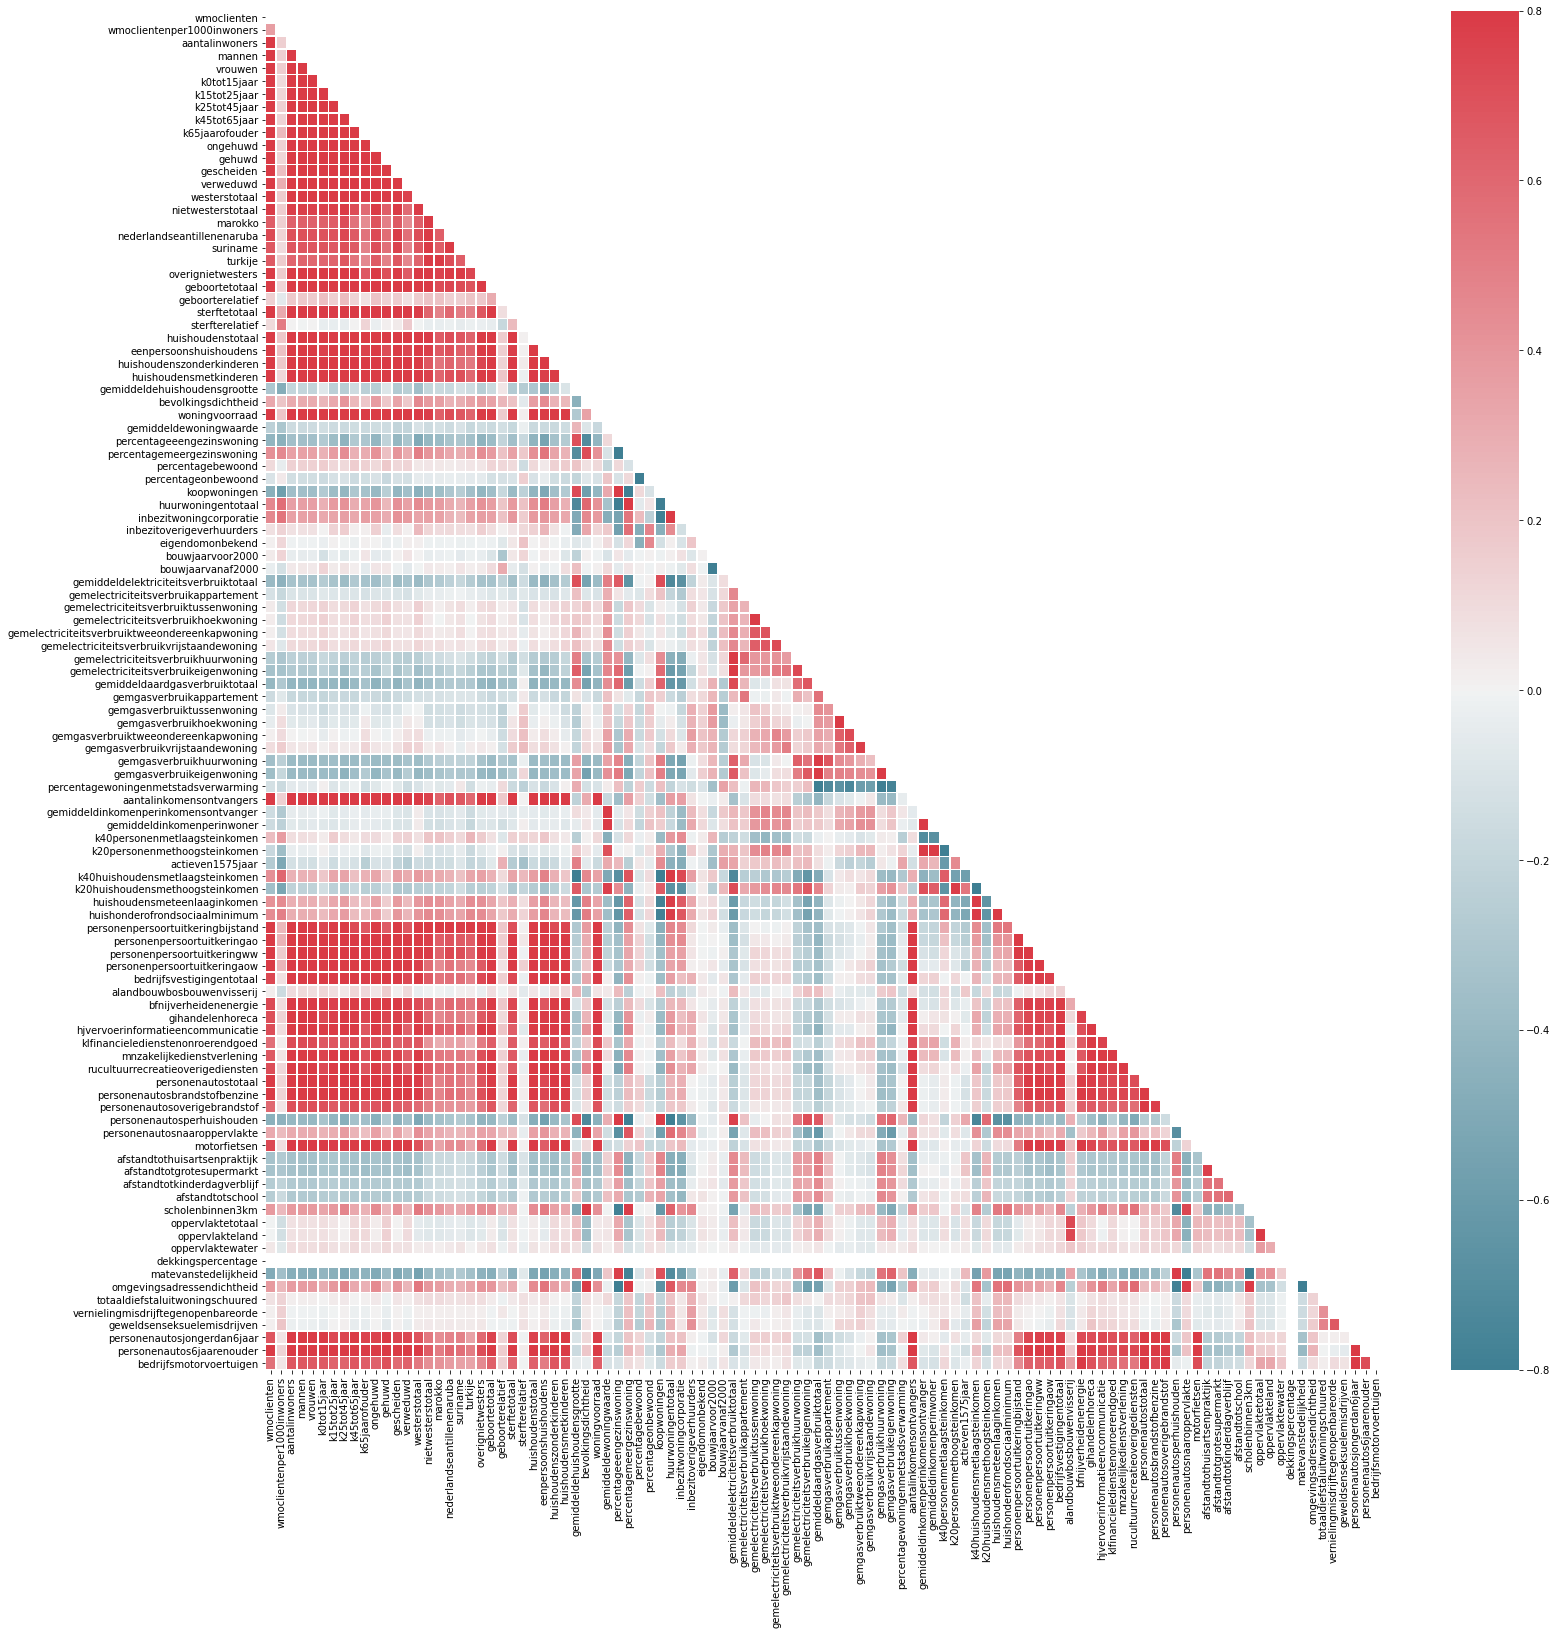

In [127]:
# heatmap maken van alle continuous variables
df_corr = df.corr()
plt.figure(figsize=(25, 25))
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # zorgen dat maar de helft van het vierkant wordt getoond
sns.heatmap(df_corr,cmap=sns.diverging_palette(220, 10, as_cmap=True), linewidths=.5, vmin = -0.8, vmax = 0.8, mask=mask)

## modellen uitproberen

In [128]:
# van object kolommen category maken 
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype('category')

In [129]:
df['wmoclientenper1000inwoners'] += 1

In [130]:
# X en y aanmaken
X = df.drop(['wmoclienten'], axis=1)
X = X.drop(['wmoclientenper1000inwoners'], axis=1)
y = np.log(df['wmoclientenper1000inwoners'])

In [131]:
# splitsen van X en y in train/test. Random_state = 42 als vaste seed voor reproduceerbaarheid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)#, random_state = 42)

In [132]:
# splitsen van X_train in categorische en numerieke kolommen, om apart te kunnen transformeren
cat_cols = X_train.select_dtypes(include=['category']).columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

In [133]:
# pipelines (pl) maken voor imputing, scaling en OneHotEncoding per datatype 

# categorie met waarde die is gegeven aan "MISSING" toevoegen
for col in cat_cols:
    # need to add category for missings, otherwise error with OneHotEncoding (volgens mij ook met alleen imputing)
    X_train[col].cat.add_categories(MISSING, inplace=True)
categories = [X_train[col].cat.categories for col in cat_cols]

# pipeline voor categorial datatype
pl_ppc_cat = make_pipeline(
     SimpleImputer(
         missing_values = np.nan
        ,strategy='constant'
        ,fill_value=MISSING)
    ,OneHotEncoder(categories=categories)
)

# pipeline voor numeriek datatype
pl_ppc_num = make_pipeline(
     SimpleImputer(
         missing_values = np.nan
        ,strategy='mean')
    ,StandardScaler()
    ,PCA() # PCA heeft behoorlijk wat invloed op de RMSE scores, heb deze toegevoegd voor alle pipelines.
)

In [134]:
# pipelines maken om de preprocessing van de imputing te combineren
pl_ppc_total = make_column_transformer(
     (pl_ppc_cat, cat_cols)
    ,(pl_ppc_num, num_cols)
    ,remainder = 'drop'
)

### Lineair Regression

In [135]:
# pipeline maken voor LinearRegression 
pl_lr = make_pipeline(
     pl_ppc_total
    ,LinearRegression()
)

In [136]:
# scores voor LR berekenen
lr_scores = cross_validate(
    pl_lr, X_train, y_train,
    cv=10,
    scoring=(['neg_mean_squared_error']),
    return_train_score=True,
    return_estimator=True,
)

In [137]:
# pipeline maken voor RidgeRegression 
pl_rr = make_pipeline(
     pl_ppc_total
    ,Ridge()
)

In [138]:
rr_scores = cross_validate(
    pl_rr, X_train, y_train,
    cv=10,
    scoring=(['neg_mean_squared_error']),
    return_train_score=True,
    return_estimator=True,
)

In [139]:
# pipeline maken voor Lasso
pl_lasso = make_pipeline(
      pl_ppc_total
     ,Lasso(alpha=0.001)
)

In [140]:
lasso_scores = cross_validate(
    pl_lasso, X_train, y_train,
    cv = RepeatedKFold(n_splits=30, n_repeats=5, random_state=1),
    scoring=(['neg_mean_squared_error']),
    return_train_score=True,
    return_estimator=True,
)

In [141]:
# pipeline maken voor KNN
pl_knn = make_pipeline(
      pl_ppc_total
     ,KNeighborsRegressor()
)

In [142]:
knn_scores = cross_validate(
    pl_knn, X_train, y_train,
    cv=10,
    scoring=(['neg_mean_squared_error']),
    return_train_score=True,
    return_estimator=True,
)

In [143]:
# pipeline maken voor SVM
pl_svm = make_pipeline(
      pl_ppc_total
     ,SVR()
)

In [144]:
svm_scores = cross_validate(
    pl_svm, X_train, y_train,
    cv=10,
    scoring=(['neg_mean_squared_error']),
    return_train_score=True,
    return_estimator=True,
)

In [145]:
# pipeline maken voor XGB
pl_xgb = make_pipeline(
      pl_ppc_total
     ,XGBRegressor()
) 

In [146]:
xgb_scores = cross_validate(
    pl_xgb, X_train, y_train,
    cv=10,
    scoring=(['neg_mean_squared_error']),
    return_train_score=True,
    return_estimator=True,
)

In [147]:
# functie maken om op basis van de cv scores, het beste model te selecteren 
def get_best_model(cv_scores):
    """
    Return best (most conservative) model from cross_validate object.
    
    Uses np.argmax to find bottomright point == largest RMLSE
    """
    index = np.argmax(np.sqrt(-cv_scores['train_neg_mean_squared_error']))
    model = cv_scores['estimator'][index]
    rmsle = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    return (rmsle)

In [148]:
# toevoegen van de beste scores, per model, aan een lijst
scores = []
scores.append(('LR',  get_best_model(lr_scores)))
scores.append(('RR',  get_best_model(rr_scores)))
scores.append(('Lasso', get_best_model(lasso_scores)))
scores.append(('KNN', get_best_model(knn_scores)))
scores.append(('SVM', get_best_model(svm_scores)))
scores.append(('XGB', get_best_model(xgb_scores)))

In [149]:
# maken van een dataframe met daarin de gesorteerde scores per model
scores = pd.DataFrame(scores)
scores.columns = ['Algorithm', 'RMSE'] 
scores['RMSE'] = scores['RMSE'].map('{:,.4f}'.format)
scores = scores.sort_values('RMSE', ascending=True)
scores = scores.reset_index(drop=True)
scores

,Algorithm,RMSE
0,SVM,0.2810
1,LR,0.2893
2,RR,0.2901
3,XGB,0.2956
4,KNN,0.3270
5,Lasso,0.3370


In [150]:
# and the winner is...
print(f"Het algoritme met de laagste RMSE is:\n\n{scores.iloc[0,0]}, met een RMSE van {scores.iloc[0,1]}")

Het algoritme met de laagste RMSE is:

SVM, met een RMSE van 0.2810
